<a href="https://colab.research.google.com/github/talisma-cassoma/plant-disease-study/blob/main/standard_area_diagram_SAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

colectect images from dataset

In [1]:
!pip install -qq rembg[gpu]==2.0.28
!pip install -qq pillow==9.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 MB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 9.7 MB/s eta 0:00:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!rm -rf /content/drive/MyDrive/plant-disease-segmentation-dataset/removed_bkg_images
!mkdir /content/drive/MyDrive/plant-disease-segmentation-dataset/removed_bkg_images

In [4]:
#set variables
input_path = "/content/drive/MyDrive/plant-disease-segmentation-dataset/aug_data/aug_data/images"
output_path= "/content/drive/MyDrive/plant-disease-segmentation-dataset/removed_bkg_images"

removing dataset image background

In [ ]:
import cv2
import rembg
import sys
from pathlib import Path
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm


def is_image(absolute_path: Path):
    return absolute_path.is_file() and str(absolute_path).endswith('.jpg')

input_filenames = [p for p in filter(is_image, Path(input_path).iterdir())]

def process_image(image_path):
    try:
        image = cv2.imread(str(image_path))
        if image is None or not image.data:
            raise cv2.error("read failed")
        output = rembg.remove(image)
        out_path = Path(output_path) / image_path.name
        cv2.imwrite(str(out_path), output)
        return True
    except Exception as e:
        return False

executor = ThreadPoolExecutor(max_workers=4)

with tqdm(total=len(input_filenames), desc="Processing images") as pbar:
    for result in executor.map(process_image, input_filenames):
        if result:
            pbar.update(1)


Processing images:   0%|          | 0/2940 [00:00<?, ?it/s]Downloading data from 'https://github.com/danielgatis/rembg/releases/download/v0.0.0/u2net.onnx' to file '/root/.u2net/u2net.onnx'.

  0%|                                               | 0.00/176M [00:00<?, ?B/s]

  0%|                                               | 0.00/176M [00:00<?, ?B/s]


  0%|                                               | 0.00/176M [00:00<?, ?B/s]



  0%|                                               | 0.00/176M [00:00<?, ?B/s]
  0%|▏                                      | 771k/176M [00:00<00:22, 7.71MB/s]

  0%|                                       | 534k/176M [00:00<00:32, 5.33MB/s]


  0%|▏                                      | 565k/176M [00:00<00:31, 5.64MB/s]



  0%|▏                                      | 596k/176M [00:00<00:29, 5.96MB/s]
  1%|▎                                     | 1.54M/176M [00:00<00:28, 6.07MB/s]

  1%|▏                                     | 1.12M/176M [00:00<00:30, 5.64M

In [2]:
# dir avriables
originals_directory = "/content/drive/MyDrive/plant-disease-segmentation-dataset/removed_bkg_image_verified"
masks_directory = "/content/drive/MyDrive/plant-disease-segmentation-dataset/aug_data/aug_data/masks"
csv_filename = "severity_data.csv"


In [3]:
import os
import cv2
import csv
from tqdm import tqdm
import numpy as np


def calculate_severity(original_image_path, mask_image_path):
    original_image = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)
    image_mask = cv2.imread(mask_image_path, cv2.IMREAD_GRAYSCALE)

    # Contar pixels não zero em cada imagem
    num_pixels_original_image = cv2.countNonZero(original_image)
    num_pixels_image_mask = cv2.countNonZero(image_mask)

    # Calcular a porcentagem de severidade
    severity_percentage = (num_pixels_image_mask / num_pixels_original_image) * 100

    # Aplicar operações morfológicas para melhorar a máscara
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    mask_dilated = cv2.dilate(image_mask, kernel, iterations=2)
    mask_eroded = cv2.erode(mask_dilated, kernel, iterations=2)

    # Encontrar contornos na máscara erodida
    contours, _ = cv2.findContours(mask_eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Criar uma nova máscara para a parte saudável
    healthy_mask = np.zeros_like(original_image)
    cv2.drawContours(healthy_mask, contours, -1, (255), thickness=cv2.FILLED)

    # Contar pixels não zero na máscara saudável
    num_pixels_healthy = cv2.countNonZero(healthy_mask)

    # Calcular a área da região saudável
    area_susceptible = num_pixels_healthy

    return severity_percentage, area_susceptible, num_pixels_original_image, num_pixels_image_mask


def collect_images(originals_directory, masks_directory):
    original_images = []
    mask_images = []

    # Obter lista de arquivos no diretório de originais
    original_files = [filename for filename in os.listdir(originals_directory) if filename.endswith(".jpg")]
    # Inicializar barra de progresso
    progress_bar = tqdm(total=len(original_files), desc='Collecting Images and Masks')

    # Loop através do diretório de imagens originais
    for filename in original_files:
        original_image_path = os.path.join(originals_directory, filename)
        mask_image_path = os.path.join(masks_directory, os.path.splitext(filename)[0] + ".png")
        if os.path.exists(mask_image_path):
            original_images.append(original_image_path)
            mask_images.append(mask_image_path)
        progress_bar.update(1)  # Atualizar barra de progresso

    progress_bar.close()  # Fechar barra de progresso

    return original_images, mask_images

def save_to_csv(data, csv_filename):
    with open(csv_filename, 'w', newline='') as csvfile:
        fieldnames = ['Original_Image', 'Mask_Image', 'Severity', 'Area_Susceptible', 'Num_Pixels_Original', 'Num_Pixels_Mask']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        for row in data:
            writer.writerow(row)

def check_directory(directory):
    if os.path.exists(directory):
        files = os.listdir(directory)
        print(f"Files in directory '{directory}':")
        for file in files:
            print(file)
    else:
        print(f"Directory '{directory}' does not exist.")

# Verificar diretórios
# check_directory(input_path)
# check_directory(masks_directory)

# Coletar imagens com barras de progresso
original_images, mask_images = collect_images(originals_directory, masks_directory)

# Inicializar barra de progresso para cálculo de severidade
severity_progress_bar = tqdm(total=len(original_images), desc='Calculating severity')

# Calcular severidade para cada imagem e salvar em uma lista de dicionários
data = []
for original_image, mask_image in zip(original_images, mask_images):
    severity, area_susceptible, num_pixels_original, num_pixels_mask = calculate_severity(original_image, mask_image)
    data.append({'Original_Image': original_image, 'Mask_Image': mask_image, 'Severity': severity, 'Area_Susceptible': area_susceptible, 'Num_Pixels_Original': num_pixels_original, 'Num_Pixels_Mask': num_pixels_mask})

    # Atualizar barra de progresso de severidade
    severity_progress_bar.update(1)

# Fechar barra de progresso de severidade
severity_progress_bar.close()

# Salvar os resultados em um arquivo CSV
save_to_csv(data, csv_filename)


Calculating severity: 100%|██████████| 1799/1799 [10:26<00:00,  2.87it/s]


## print the Standard area disease **set** (SAD) for aiding visual estimates

In [7]:
# severity value and theirs respectif representant image in dataset
severity_values = [00.30, 01.00, 03.39, 05.00, 10.00, 25.00, 40.00, 55.00, 70.00, 85.00, 96.68]
severity_values_representant =["00425_1.jpg","00031_0.jpg","00119_0.jpg","00255_0.jpg","00197_3.jpg","00084_3.jpg","00334_4.jpg","00154_0.jpg","00209_1.jpg","00030_0.jpg","00248_2.jpg"]

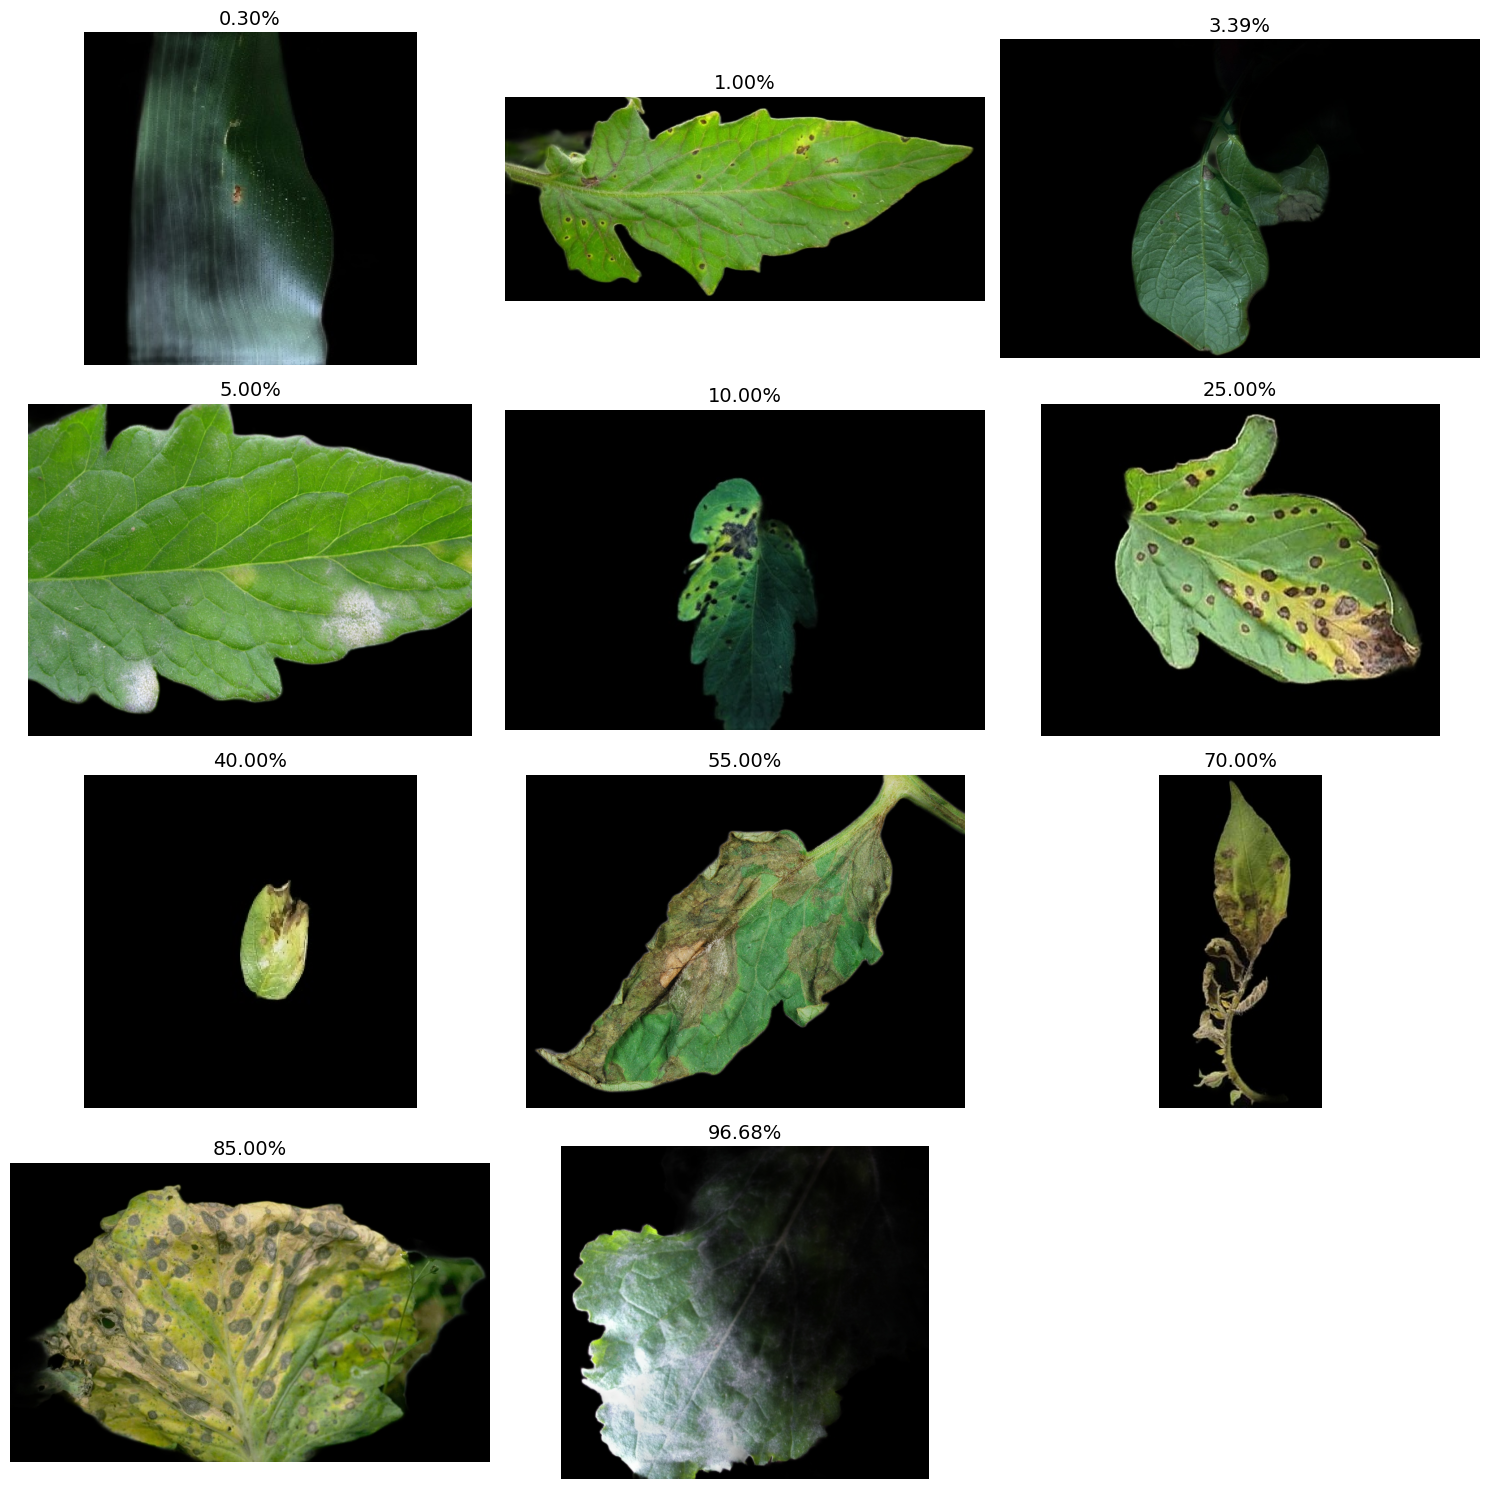

In [8]:
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread

def display_severity_images(output_path, severity_values, severity_values_representant, max_cols=3, fig_size=(15, 15), title_size=14):
    # Check if directory exists
    if not os.path.exists(output_path):
        print(f"Directory '{output_path}' does not exist.")
        return

    # Calculate number of rows and columns for the grid
    num_images = len(severity_values_representant)
    num_rows = (num_images - 1) // max_cols + 1  # Ceiling division
    num_cols = min(max_cols, num_images)

    # Create a figure to display the images
    fig, axes = plt.subplots(num_rows, num_cols, figsize=fig_size)

    # Iterate over the severity values and their representative images
    for i, (severity, image_file) in enumerate(zip(severity_values, severity_values_representant)):
        # Construct the full image path
        image_path = os.path.join(output_path, image_file)

        # Check if the image file exists
        if not os.path.exists(image_path):
            print(f"Image file '{image_path}' does not exist.")
            continue

        # Read the image
        image = imread(image_path)

        # Determine the position in the grid
        row = i // max_cols
        col = i % max_cols

        # If there's only one row, axes is 1D
        if num_rows == 1:
            ax = axes[col]
        else:
            ax = axes[row, col]

        # Display the image
        ax.imshow(image)
        ax.axis('off')  # Turn off axis
        ax.set_title(f'{severity:.2f}%', fontsize=title_size)  # Set title as percentage

    # Remove any empty subplots
    for i in range(num_images, num_rows * num_cols):
        if num_rows == 1:
            fig.delaxes(axes[i])
        else:
            fig.delaxes(axes.flatten()[i])

    # Adjust layout and display the figure
    plt.tight_layout()
    plt.show()

# Display images with severity values
display_severity_images(output_path, severity_values, severity_values_representant, max_cols=3, fig_size=(15, 15), title_size=14)
